# Model CNN Emejleano

In [1]:
!pip install -q kaggle

In [2]:
!mkdir ~/kaggle

In [4]:
!cp kaggle.json ~/.kaggle

In [8]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': Not a directory


In [9]:
!kaggle datasets download -d drgfreeman/rockpaperscissors

Dataset URL: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors
License(s): CC-BY-SA-4.0
 99% 303M/306M [00:09<00:00, 29.8MB/s]
100% 306M/306M [00:09<00:00, 32.9MB/s]


In [26]:
# Commented out IPython magic to ensure Python compatibility.
import zipfile
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from google.colab import files
from tensorflow.keras.preprocessing import image

In [27]:
# Ekstrak dataset
with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('rockpaperscissors')

# Path dataset
base_dir = 'rockpaperscissors/rps-cv-images'
classes = ['rock', 'paper', 'scissors']

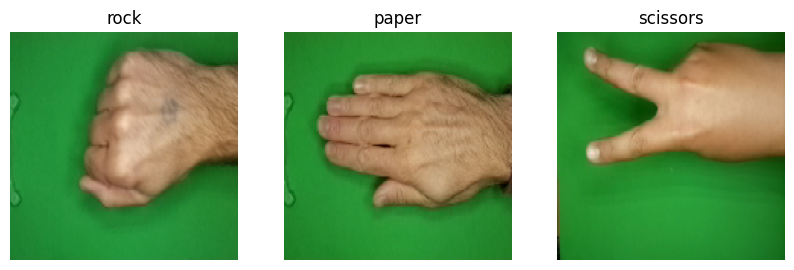

In [28]:
# Tampilkan beberapa gambar dari dataset
plt.figure(figsize=(10, 10))
for i, cls in enumerate(classes):
    cls_dir = os.path.join(base_dir, cls)
    img_path = os.path.join(cls_dir, os.listdir(cls_dir)[0])
    img = load_img(img_path, target_size=(150, 150))
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(cls)
    plt.axis('off')
plt.show()

In [29]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

validation_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4)
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = validation_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [32]:
# Arsitektur CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 15, 15, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,812,995 (25.99 MB)

 Trainable params: 6,812,995 (25.99 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [63]:
# Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.98:
            print("\nAkurasi validasi melebihi 98%, hentikan training!")
            self.model.stop_training = True

callbacks = myCallback()

In [64]:
# Training model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 19s 356ms/step - accuracy: 0.9687 - loss: 0.1163 - val_accuracy: 0.9525 - val_loss: 0.2160
Epoch 2/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9688 - loss: 0.0443 - val_accuracy: 0.9537 - val_loss: 0.2021
Epoch 3/25
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.9572 - loss: 0.1313
Akurasi validasi melebihi 98%, hentikan training!
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9573 - loss: 0.1310 - val_accuracy: 0.9896 - val_loss: 0.0627


In [65]:
# Evaluasi model
val_loss, val_acc = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_acc * 100:.2f}%')

28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.9887 - loss: 0.0546
Validation Accuracy: 98.97%


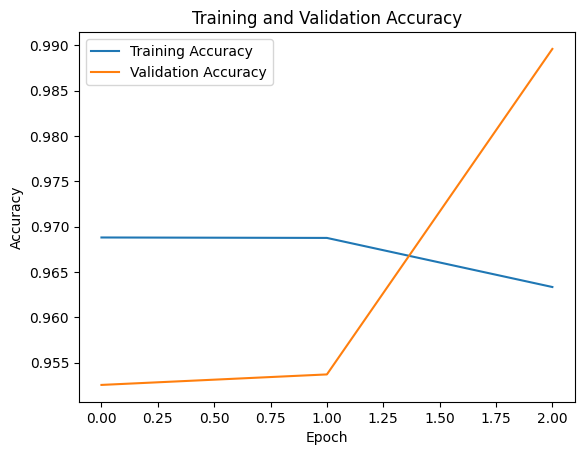

In [66]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

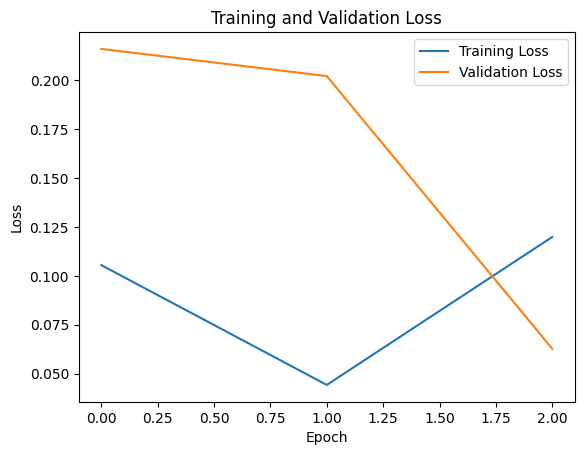

In [67]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving images.jpeg to images (5).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


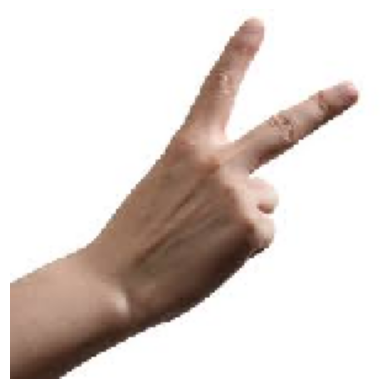

Prediksi: gunting


In [74]:
# Prediksi dengan gambar baru
def upload_and_predict():
    uploaded = files.upload()
    for fn in uploaded.keys():
        img_path = '/content/' + fn
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        predictions = model.predict(img_array)
        predicted_class = np.argmax(predictions, axis=1)

        plt.imshow(img)
        plt.axis('off')
        plt.show()

        class_labels = ['gunting', 'kertas', 'batu']
        predicted_class_label = class_labels[predicted_class[0]]
        print(f"Prediksi: {predicted_class_label}")

# Jalankan fungsi prediksi
upload_and_predict()